In [70]:
import os
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import librosa.display
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

try:
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
except:
    !pip install spela
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
    
tf.compat.v1.disable_eager_execution()
data_dir = r"F:\Augmentated_Train"

In [71]:
# get wav paths
def get_wav_paths(speaker):
    speaker_path = data_dir + speaker
    all_paths = [item for item in os.listdir(speaker_path)]
    return all_paths

In [72]:
id_list = ['ID_01','ID_03','ID_04','ID_05','ID_06','ID_07','ID_09','ÍD_10','ID_12','ID_13','ID_14','ID_15','ID_16','ID_17','ID_19','ID_20','ID_29','ID_30','ID_31','ID_32','ID_43','ID_45','ID_48','ID_50','ID_55','ID_56','ID_58','ID_64']


In [73]:
id_01_path = get_wav_paths("/ID_01")
id_03_path = get_wav_paths("/ID_03")
id_04_path = get_wav_paths("/ID_04")
id_05_path = get_wav_paths("/ID_05")
id_06_path = get_wav_paths("/ID_06")
id_07_path = get_wav_paths("/ID_07")
id_09_path = get_wav_paths("/ID_09")
id_10_path = get_wav_paths("/ID_10")
id_12_path = get_wav_paths("/ID_12")
id_13_path = get_wav_paths("/ID_13")
id_14_path = get_wav_paths("/ID_14")
id_15_path = get_wav_paths("/ID_15")
id_16_path = get_wav_paths("/ID_16")
id_17_path = get_wav_paths("/ID_17")
id_19_path = get_wav_paths("/ID_19")
id_20_path = get_wav_paths("/ID_20")
id_29_path = get_wav_paths("/ID_29")
id_30_path = get_wav_paths("/ID_30")
id_31_path = get_wav_paths("/ID_31")
id_32_path = get_wav_paths("/ID_32")
id_43_path = get_wav_paths("/ID_43")
id_45_path = get_wav_paths("/ID_45")
id_48_path = get_wav_paths("/ID_48")
id_50_path = get_wav_paths("/ID_50")
id_55_path = get_wav_paths("/ID_55")
id_56_path = get_wav_paths("/ID_56")
id_58_path = get_wav_paths("/ID_58")
id_64_path = get_wav_paths("/ID_64")

In [74]:
# load the data
def load_wav(wav_path, speaker):
    with tf.compat.v1.Session(graph=tf.compat.v1.Graph()) as sess:
        wav_path = data_dir +speaker + "/"+ wav_path
        wav_filename_placeholder = tf.compat.v1.placeholder(tf.compat.v1.string, [])
        wav_loader = tf.io.read_file(wav_filename_placeholder)
        wav_decoder = tf.audio.decode_wav(wav_loader, desired_channels=1)
        wav_data = sess.run(
            wav_decoder, feed_dict={
                wav_filename_placeholder: wav_path
            }).audio.flatten().reshape((1, 132300))
        sess.close()
    return wav_data

In [75]:
# create training data
def generate_training_data(speaker_paths, speaker, label):
    wavs, labels = [], []
    count = 0
    for i in tqdm(speaker_paths):
        if count>20:
            break
        wav = load_wav(i, speaker)
        wavs.append(wav)
        labels.append(label)
        count += 1
    return wavs, labels

In [76]:
id_01_wavs, id_01_labels = generate_training_data(id_01_path, "/ID_01",0) 
id_03_wavs, id_03_labels = generate_training_data(id_03_path, "/ID_03",1) 
id_04_wavs, id_04_labels = generate_training_data(id_04_path, "/ID_04",2)
id_05_wavs, id_05_labels = generate_training_data(id_05_path, "/ID_05",3)
id_06_wavs, id_06_labels = generate_training_data(id_06_path, "/ID_06",4)
id_07_wavs, id_07_labels = generate_training_data(id_07_path, "/ID_07",5)
id_09_wavs, id_09_labels = generate_training_data(id_09_path, "/ID_09",6)
id_10_wavs, id_10_labels = generate_training_data(id_10_path, "/ID_10",7)
id_12_wavs, id_12_labels = generate_training_data(id_12_path, "/ID_12",8)
id_13_wavs, id_13_labels = generate_training_data(id_13_path, "/ID_13",9)
id_14_wavs, id_14_labels = generate_training_data(id_14_path, "/ID_14",10)
id_15_wavs, id_15_labels = generate_training_data(id_15_path, "/ID_15",11)
id_16_wavs, id_16_labels = generate_training_data(id_16_path, "/ID_16",12)
id_17_wavs, id_17_labels = generate_training_data(id_17_path, "/ID_17",13)
id_19_wavs, id_19_labels = generate_training_data(id_19_path, "/ID_19",14)
id_20_wavs, id_20_labels = generate_training_data(id_20_path, "/ID_20",15)
id_29_wavs, id_29_labels = generate_training_data(id_29_path, "/ID_29",16)
id_30_wavs, id_30_labels = generate_training_data(id_30_path, "/ID_30",17)
id_31_wavs, id_31_labels = generate_training_data(id_31_path, "/ID_31",18)
id_32_wavs, id_32_labels = generate_training_data(id_32_path, "/ID_32",19)
id_43_wavs, id_43_labels = generate_training_data(id_43_path, "/ID_43",20)
id_45_wavs, id_45_labels = generate_training_data(id_45_path, "/ID_45",21)
id_48_wavs, id_48_labels = generate_training_data(id_48_path, "/ID_48",22)
id_50_wavs, id_50_labels = generate_training_data(id_50_path, "/ID_50",23)
id_55_wavs, id_55_labels = generate_training_data(id_55_path, "/ID_55",24)
id_56_wavs, id_56_labels = generate_training_data(id_56_path, "/ID_56",25)
id_58_wavs, id_58_labels = generate_training_data(id_58_path, "/ID_58",26)
id_64_wavs, id_64_labels = generate_training_data(id_64_path, "/ID_64",27)

  2%|▏         | 21/1120 [00:00<00:04, 248.18it/s]


In [77]:
all_wavs = id_01_wavs + id_03_wavs + id_04_wavs + id_05_wavs + id_06_wavs + id_07_wavs + id_09_wavs + id_10_wavs + id_12_wavs + id_13_wavs + id_14_wavs + id_15_wavs + id_16_wavs + id_17_wavs + id_19_wavs + id_20_wavs + id_29_wavs + id_30_wavs + id_31_wavs + id_32_wavs  + id_43_wavs + id_45_wavs + id_48_wavs+ id_50_wavs+ id_55_wavs+ id_56_wavs+ id_58_wavs+ id_64_wavs

all_labels = id_01_labels + id_03_labels + id_04_labels + id_05_labels + id_06_labels + id_07_labels + id_09_labels + id_10_labels + id_12_labels + id_13_labels + id_14_labels + id_15_labels + id_16_labels + id_17_labels + id_19_labels + id_20_labels + id_29_labels  + id_30_labels + id_31_labels + id_32_labels  + id_43_labels + id_45_labels + id_48_labels+ id_50_labels+ id_55_labels+ id_56_labels+ id_58_labels+ id_64_labels

In [78]:
# split the dataset into trainin and testing set\

train_wavs, test_wavs, train_labels, test_labels = train_test_split(all_wavs, all_labels, test_size=0.2)
del all_wavs
del all_labels
train_x, train_y = np.array(train_wavs), np.array(train_labels)
del train_wavs
del train_labels
print(train_x.shape)
print(train_y.shape)
test_x, test_y = np.array(test_wavs), np.array(test_labels)
del test_wavs
del test_labels
print(test_x.shape)


(470, 1, 132300)
(470,)
(118, 1, 132300)


In [79]:
# MFCC Feature Extraction

train_x_new = []
test_x_new = []
INPUT_SHAPE = (517,128)

train_x_new = np.zeros((train_x.shape[0], INPUT_SHAPE[0], INPUT_SHAPE[1]), dtype=np.float64)

count = 0
for sample in train_x:
    
    sample = sample.reshape(132300,)
    train_x_new[count, :, :128] = librosa.feature.mfcc(y=sample, sr=2*44100, hop_length=256, n_fft=256, n_mfcc=128).T
    count += 1
    if count%400== 0:
        print('Train', count)
        
test_x_new = np.zeros((test_x.shape[0], INPUT_SHAPE[0], INPUT_SHAPE[1]), dtype=np.float64)

count = 0
for sample in test_x:
    sample = sample.reshape(132300,)
    test_x_new[count, :, :128] = librosa.feature.mfcc(y=sample, sr=2*44100, hop_length=256, n_fft=256, n_mfcc=128).T
    count += 1
    if count%100 == 0:
        print('Test', count) 
        
del train_x
del test_x
        

C:\Anaconda\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


Train 400
Test 100


In [80]:

print(train_x_new.shape)

nsamples, nx, ny = train_x_new.shape
train_x_new = train_x_new.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_x_new.shape
test_x_new = test_x_new.reshape((nsamples,nx*ny))

(470, 517, 128)


In [81]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
print("Model Running for MFCC")
for i in tqdm(range(1)): 
    svc = SVC(C = 10,kernel = 'linear')#, probability=True) 
    svc.fit(train_x_new, train_y)

print("Done with Modeling")

  0%|          | 0/1 [00:00<?, ?it/s]

Model Running for MFCC


100%|██████████| 1/1 [00:09<00:00,  9.90s/it]

Done with Modeling


In [82]:
pred_svc = svc.predict(test_x_new)
print(confusion_matrix(test_y, pred_svc))
print(classification_report(test_y, pred_svc))
print(accuracy_score(test_y, pred_svc))

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

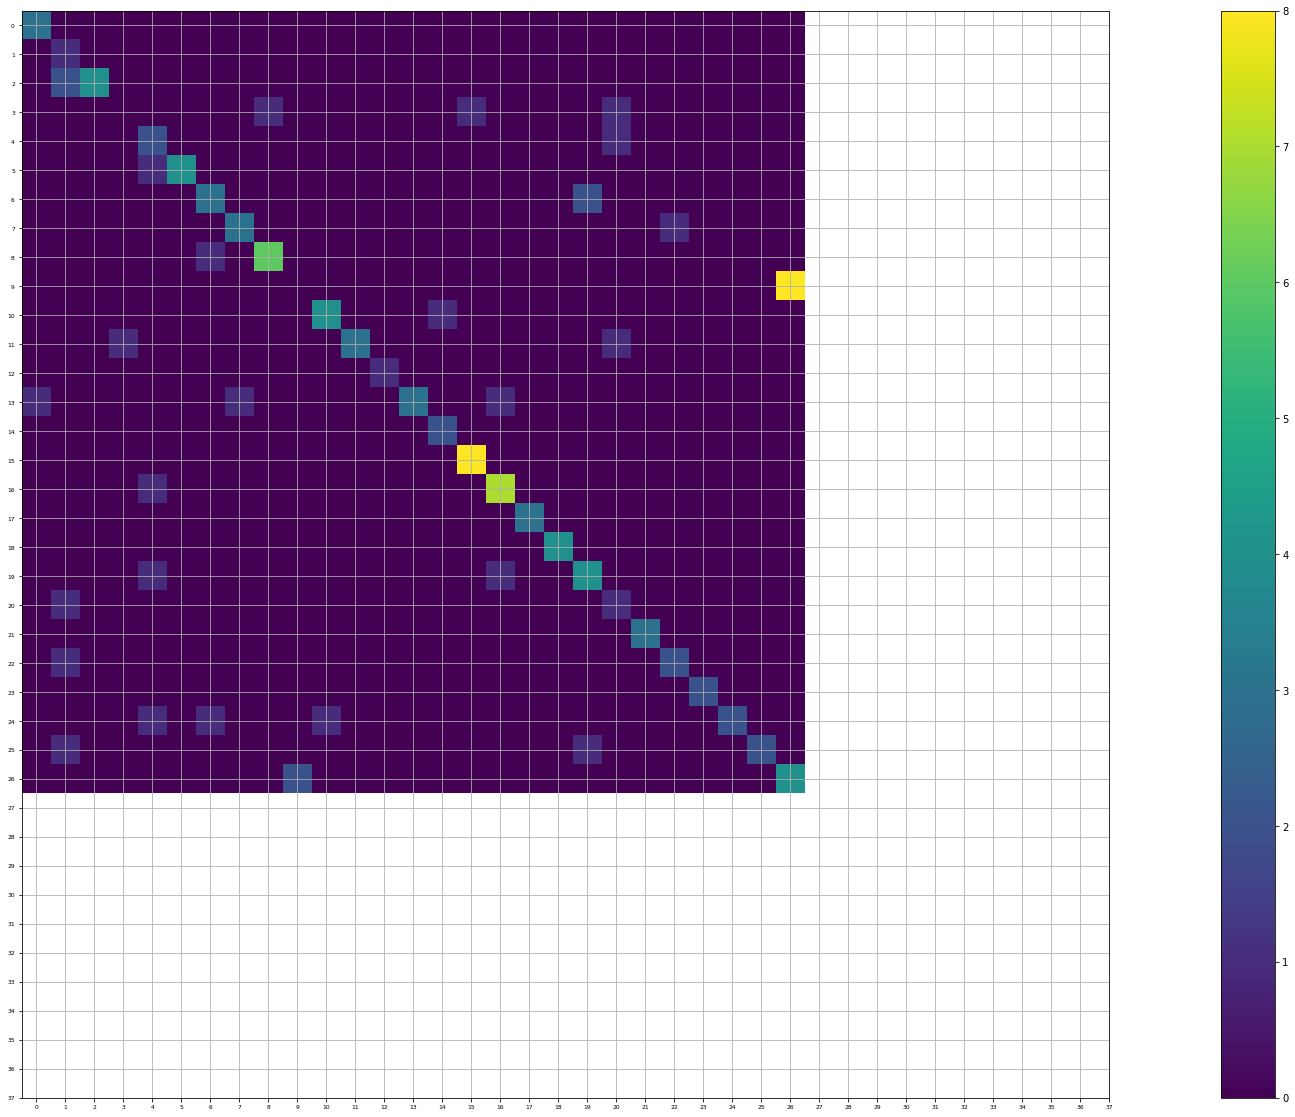

In [83]:
matrix = metrics.confusion_matrix(test_y, pred_svc)
print(matrix)
plt.rcParams["figure.figsize"] = (40,20)
plt.imshow(matrix)
plt.colorbar()
ticks=np.linspace(0, 37,num=38)
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [ ]:
# import pickle
# filename = 'SVM_MFCC.sav'
# pickle.dump(svc, open(filename, 'wb'))
# print("Saved model to disk")


# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)
# import sys

# print(sys.version)